# Рахель Марк БПМ 161
# Лабораторная работа №4
# Вариант 19
# № 4.1.19

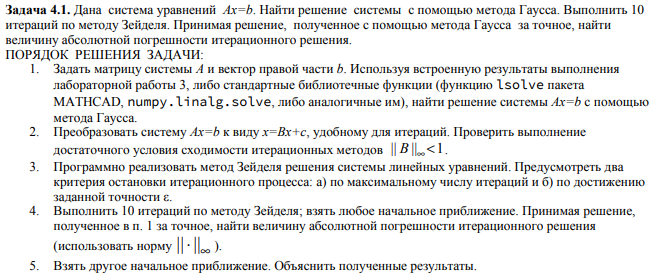

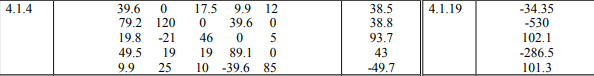

In [1]:
import numpy as np
from numpy.linalg import inv
import scipy.linalg as sp
import matplotlib.pyplot as plt

Начальные данные и решение системы с помощью встроенной функции

In [2]:
A = np.array([[39.6, 0, 17.5, 9.9, 12],
              [79.2, 120, 0, 39.6, 0],
              [19.8, -21, 46, 0, 5],
              [49.5, 19, 19, 89.1, 0], 
              [9.9, 25, 10, -39.6, 85]])
b = np.array([-34.35, -530, 102.1, -286.5, 101.3])
print(A)
print(b)

[[ 39.6   0.   17.5   9.9  12. ]
 [ 79.2 120.    0.   39.6   0. ]
 [ 19.8 -21.   46.    0.    5. ]
 [ 49.5  19.   19.   89.1   0. ]
 [  9.9  25.   10.  -39.6  85. ]]
[ -34.35 -530.    102.1  -286.5   101.3 ]


In [3]:
x_true = np.linalg.solve(A,b)
print(x_true)

[-1.19191919 -2.9         1.3        -2.21212121  1.        ]


Функции для приведения системы к удобному для итерация виду

In [4]:
def B_(A):
    b_ = np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if j != i:
                b_[i][j] = -A[i][j]/A[i][i]
    return b_

In [5]:
def C_(A, b):
    c_ = np.zeros(A.shape[0])
    for i in range(A.shape[0]):
        c_[i] = b[i]/A[i][i]
    return(c_)

In [6]:
B = B_(A)
c = C_(A, b)

print(B)
print(c)

[[ 0.         -0.         -0.44191919 -0.25       -0.3030303 ]
 [-0.66        0.         -0.         -0.33       -0.        ]
 [-0.43043478  0.45652174  0.         -0.         -0.10869565]
 [-0.55555556 -0.21324355 -0.21324355  0.         -0.        ]
 [-0.11647059 -0.29411765 -0.11764706  0.46588235  0.        ]]
[-0.86742424 -4.41666667  2.21956522 -3.21548822  1.19176471]


Проверка необходимого условия

In [7]:
print(np.linalg.norm(B, ord = np.inf))

0.9956521739130435


Метод Зейделя

In [8]:
eps = 1e-6
def zeid(B, c, it, x0, eps):
    L = np.tril(B)
    U = np.triu(B)
    n = c.shape[0]
    y = x0
    for k in range(it):
        z = y
        y = np.dot((inv(np.eye(n) - L)),(np.dot(U,z) + c))
        if (np.linalg.norm(y-z, ord = np.inf) <= eps):
            return y
    return y    

Проверка

In [9]:
x0_1 = np.array([1, 2, 3, 4, 5])
x1_zeid = zeid(B, c, 10, x0_1, eps)
print(x1_zeid)

[-1.19233708 -2.89986107  1.30022784 -2.21196727  1.00005273]


In [10]:
np.linalg.norm((x_true-x1_zeid), ord = np.inf)

0.0004178836583235146

Теперь возьмем вектор начальных данных, почти не отличающийся от настоящего решения

In [11]:
x2_zeid = zeid(B, c, 10, x_true + 0.1, eps)
print(x2_zeid)

[-1.19193155 -2.89999589  1.30000674 -2.21211666  1.00000156]


In [12]:
np.linalg.norm((x_true-x2_zeid), ord = np.inf)

1.2359757839419672e-05

Как можно увидеть, за 10 итераций ошибка во втором случае гораздо меньше

# № 4.2

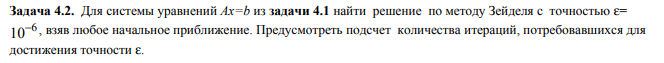

Модифицируем нашу функцию (теперь критерием останова будет только достаточно малая норма разности)

In [13]:
eps = 1e-6
def zeid_eps(B, c, x0, eps):
    L = np.tril(B)
    U = np.triu(B)
    n = c.shape[0]
    y = x0
    k = 1
    while(1):
        k += 1
        z = y
        y = np.dot((inv(np.eye(n) - L)),(np.dot(U,z) + c))
        if (np.linalg.norm(y-z, ord = np.inf) <= eps):
            return y, k   

Проверим, сколько итераций нужно сделать для заданной в условии точности

In [14]:
x1_zeid_eps, it_eps = zeid_eps(B, c, x0_1, eps)
print(x1_zeid_eps)
print(it_eps)

[-1.1919196  -2.89999986  1.30000022 -2.21212106  1.00000005]
18


In [15]:
np.linalg.norm((x_true-x1_zeid_eps), ord = np.inf)

4.0652380350891804e-07

# 4.4.10

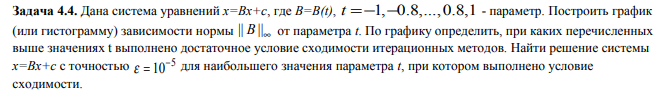

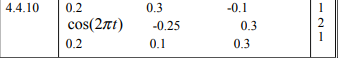

Начальные данные

In [16]:
def B(t):
    return np.array([[0.2, 0.3, -0.1], 
                    [np.cos(2*np.pi*t), -0.25, 0.3], 
                    [0.2, 0.1, 0.3]])

c = np.array([1, 2, 1])
t_ = np.array([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

График зависимости нормы матрицы $B$ от параметра $t$

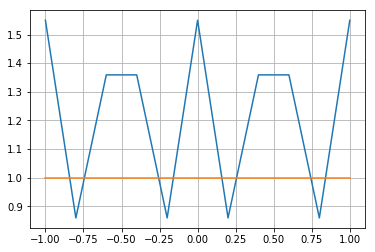

In [17]:
norm_ = [np.linalg.norm(B(t), ord = np.inf) for t in t_]
plt.plot(t_, norm_)
plt.plot(t_, np.ones(t_.shape), ls = '-')
plt.grid()

Находим максимальное значение параметра $t$, для которого норма меньше единицы

In [18]:
t_max = t_[0]
for t in t_:
    if np.linalg.norm(B(t)) <= np.linalg.norm(B(t_max)):
        t_max = t
t_max

0.8

Находим решение

In [19]:
eps1 = 1e-5
res, it = zeid_eps(B(t_max), c, np.random.rand(c.shape[0]), eps1)
print(res)
print(it)

[2.28119174 2.6646342  4.30675088]
19


Проверка

In [20]:
L_max = np.tril(B(t_max))
U_max = np.triu(B(t_max))
np.allclose(res, np.dot((inv(np.eye(L_max.shape[0]) - L_max)),(np.dot(U_max, res) + c)))

True

# 4.7.5

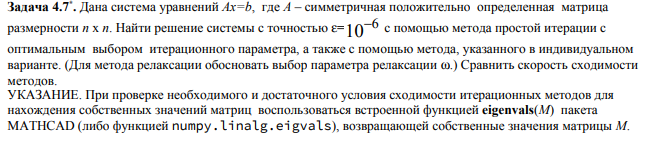

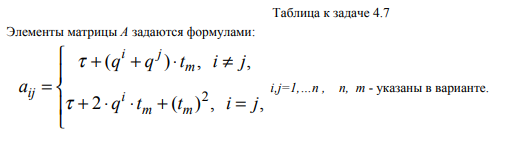

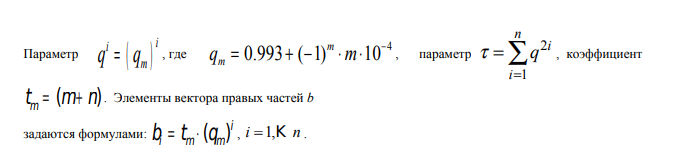

Начальные данные

In [21]:
n = 40
m = 5
t = m + n
q = 0.993 + (-1)**m*m/10000
q

0.9925

In [22]:
tau = np.sum([q ** (2 * i) for i in range(1, n + 1)])
tau

29.82297121865369

In [23]:
b = np.array([t * q ** i for i in range(1, n + 1)])
b

array([44.6625    , 44.32753125, 43.99507477, 43.6651117 , 43.33762337,
       43.01259119, 42.68999676, 42.36982178, 42.05204812, 41.73665776,
       41.42363282, 41.11295558, 40.80460841, 40.49857385, 40.19483454,
       39.89337329, 39.59417299, 39.29721669, 39.00248756, 38.70996891,
       38.41964414, 38.13149681, 37.84551058, 37.56166925, 37.27995673,
       37.00035706, 36.72285438, 36.44743297, 36.17407723, 35.90277165,
       35.63350086, 35.3662496 , 35.10100273, 34.83774521, 34.57646212,
       34.31713866, 34.05976012, 33.80431191, 33.55077957, 33.29914873])

In [24]:
A = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if (i == j):
            A[i][j] = tau + 2*q**i*t + t**2
        else:
            A[i][j] = tau + (q**i + q**j)*t
A

array([[2144.82297122,  119.48547122,  119.15050247, ...,  108.88273133,
         108.62728313,  108.37375079],
       [ 119.48547122, 2144.14797122,  118.81300247, ...,  108.54523133,
         108.28978313,  108.03625079],
       [ 119.15050247,  118.81300247, 2143.47803372, ...,  108.21026258,
         107.95481438,  107.70128204],
       ...,
       [ 108.88273133,  108.54523133,  108.21026258, ..., 2122.94249145,
          97.68704325,   97.43351091],
       [ 108.62728313,  108.28978313,  107.95481438, ...,   97.68704325,
        2122.43159505,   97.17806271],
       [ 108.37375079,  108.03625079,  107.70128204, ...,   97.43351091,
          97.17806271, 2121.92453037]])

Настоящее решение системы

In [25]:
sol = np.linalg.solve(A, b)
sol

array([0.00829974, 0.00817486, 0.00805092, 0.00792791, 0.00780582,
       0.00768464, 0.00756438, 0.00744502, 0.00732655, 0.00720897,
       0.00709227, 0.00697645, 0.00686149, 0.0067474 , 0.00663417,
       0.00652178, 0.00641024, 0.00629953, 0.00618965, 0.0060806 ,
       0.00597236, 0.00586494, 0.00575832, 0.00565251, 0.00554748,
       0.00544324, 0.00533979, 0.00523711, 0.0051352 , 0.00503406,
       0.00493367, 0.00483404, 0.00473515, 0.00463701, 0.0045396 ,
       0.00444292, 0.00434697, 0.00425174, 0.00415722, 0.00406341])

Проверим положительную определенность матрицы

In [26]:
def is_pos_def(A):
    return np.all(np.linalg.eigvals(A) > 0)
is_pos_def(A)

True

Симметричность матрицы очевидна . Значит мы можем воспользоваться методом простой итерации. Напишем функцию, реализующую этот метод

In [27]:
def s_iter(A, b, x0, it, tau, eps):
    n = A.shape[0]
    y = x0
    for i in range(it):
        z = y
        y = z - tau*(np.dot(A,z) - b)
        if np.linalg.norm(y - z) < eps:
            return y, i+1

Найдем оптимальное значение параметра

In [28]:
l_max = max(np.linalg.eigvals(A))
l_min = min(np.linalg.eigvals(A))
l_max, l_min

(6342.396840807749, 2020.7490137807379)

In [29]:
tau = 2/(l_max + l_min)
tau

0.00023914446008408292

In [30]:
eps = 1e-6
it = 1000
x0 = np.random.rand(b.shape[0])

Вычислим решение с помощью метода простых итераций и посчитаем норму разности настоящего и приближенного решений

In [31]:
x_it, iterations = s_iter(A, b, x0, it, tau, eps)
print(x_it)
print(iterations)

[0.0082997  0.00817482 0.00805087 0.00792788 0.00780575 0.00768459
 0.00756436 0.007445   0.00732653 0.00720895 0.00709225 0.00697643
 0.00686145 0.00674739 0.0066341  0.00652175 0.00641019 0.0062995
 0.00618963 0.00608055 0.00597232 0.00586489 0.00575829 0.00565248
 0.00554746 0.00544319 0.00533974 0.00523707 0.00513518 0.00503402
 0.00493361 0.00483399 0.00473509 0.00463698 0.00453958 0.00444289
 0.00434697 0.00425173 0.00415717 0.00406338]
25


In [32]:
np.linalg.norm((sol-x_it))

2.50266902658276e-07

Теперь воспользуемся методом Зейделя. Для этого сначала приведем систему к удобному для итераций виду

In [33]:
B = B_(A)
c = C_(A, b)

print(B)
print(c)

[[ 0.         -0.05570878 -0.0555526  ... -0.05076537 -0.05064627
  -0.05052806]
 [-0.05572632  0.         -0.05541269 ... -0.05062395 -0.05050481
  -0.05038656]
 [-0.05558746 -0.05543001  0.         ... -0.05048349 -0.05036432
  -0.05024604]
 ...
 [-0.05128859 -0.05112961 -0.05097183 ...  0.         -0.04601493
  -0.0458955 ]
 [-0.05118058 -0.05102157 -0.05086374 ... -0.046026    0.
  -0.04578619]
 [-0.05107333 -0.05091428 -0.05075641 ... -0.04591752 -0.04579713
   0.        ]]
[0.0208234  0.02067373 0.02052509 0.02037747 0.02023087 0.02008528
 0.01994069 0.0197971  0.01965451 0.01951289 0.01937226 0.0192326
 0.01909391 0.01895617 0.01881939 0.01868356 0.01854867 0.01841472
 0.0182817  0.0181496  0.01801842 0.01788815 0.01775879 0.01763033
 0.01750277 0.01737609 0.0172503  0.01712539 0.01700135 0.01687818
 0.01675587 0.01663441 0.0165138  0.01639404 0.01627512 0.01615703
 0.01603977 0.01592333 0.01580771 0.0156929 ]


Вычислим решение и норму разности

In [34]:
x_zeid, iterations = zeid_eps(B, c, x0, eps)
print(x_zeid)
print(iterations)

[0.00829996 0.00817506 0.00805109 0.00792805 0.00780593 0.00768473
 0.00756443 0.00744504 0.00732655 0.00720894 0.00709222 0.00697638
 0.0068614  0.0067473  0.00663405 0.00652165 0.0064101  0.00629938
 0.0061895  0.00608045 0.00597222 0.0058648  0.00575819 0.00565238
 0.00554736 0.00544314 0.00533969 0.00523703 0.00513513 0.005034
 0.00493363 0.00483401 0.00473514 0.004637   0.00453961 0.00444294
 0.004347   0.00425178 0.00415727 0.00406347]
18


In [35]:
np.linalg.norm((sol-x_zeid), ord = np.inf)

2.210015787266345e-07

Вывод: метод Зейделя сходится быстрее